1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks

### LOADING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### LOADING DATASET

In [4]:
df = pd.read_csv('Walmart (1).csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

We have a cleaned data

In [8]:
print(df['Store'].min())
print(df['Store'].max())

1
45


In [9]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


Text(0.5, 1.0, 'correlation')

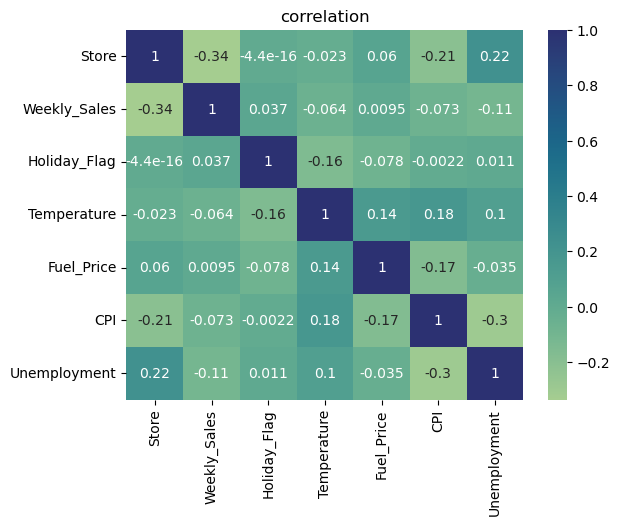

In [10]:
sns.heatmap(df.corr(),annot = True , cmap ="crest")
plt.title("correlation")

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [44]:
print(max(df['Date']))
print(min(df['Date']))

2012-10-26 00:00:00
2010-02-05 00:00:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
avg_sales = df.groupby('Store')['Weekly_Sales'].mean()
print(avg_sales)

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64


Here, 1.555264e+06 is 1,555,264
The same way the other average sales are

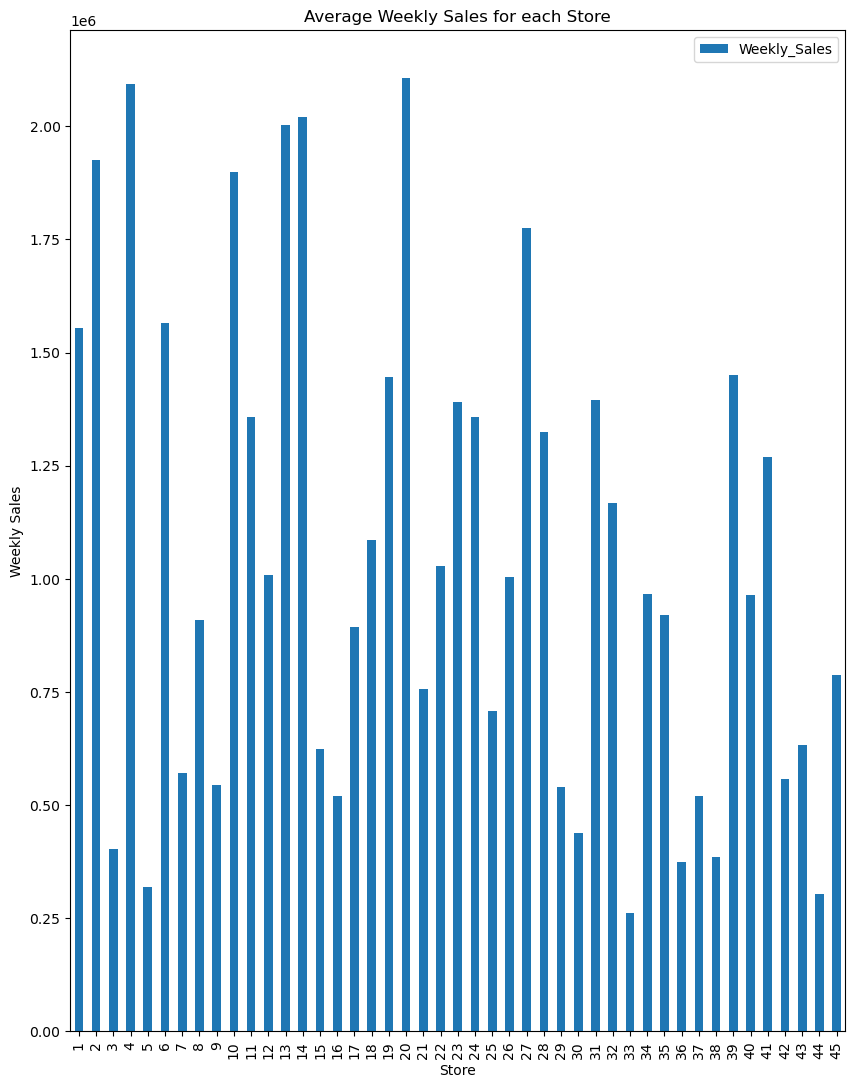

In [43]:
avg_sales.plot(kind='bar', legend=True, figsize=(10, 13))
plt.title('Average Weekly Sales for each Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

In [17]:
store_sales = df.groupby(['Store'])['Weekly_Sales'].sum().reset_index()

In [18]:
yearly_sales = df.groupby(pd.Grouper(key='Date', freq='Y')).sum().reset_index()

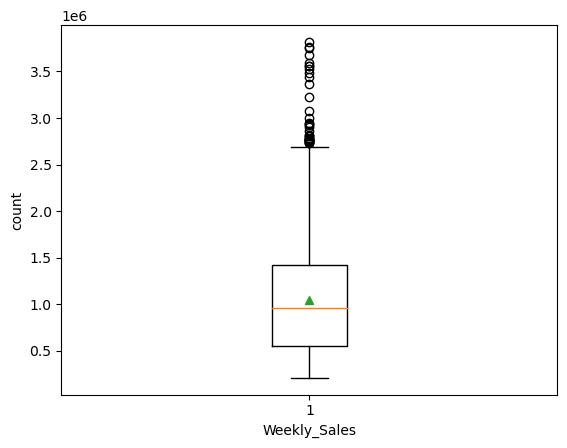

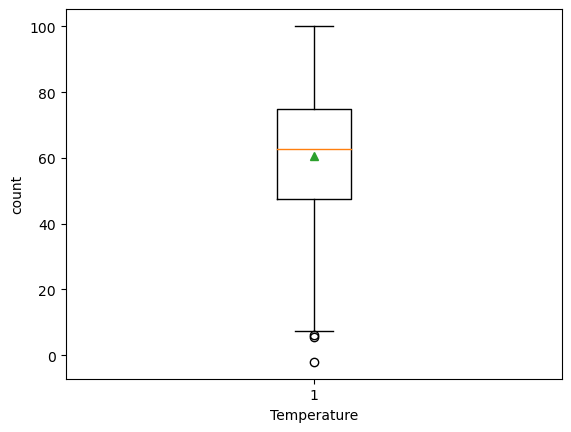

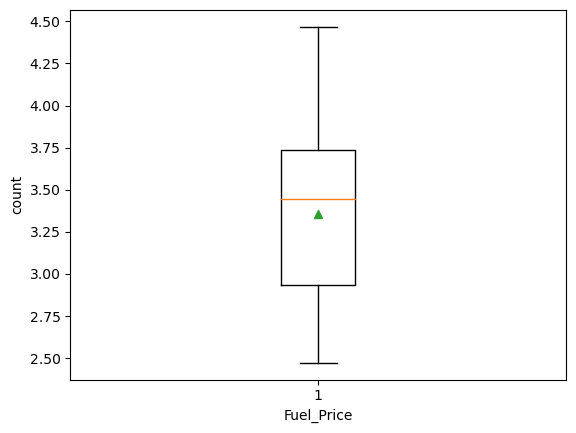

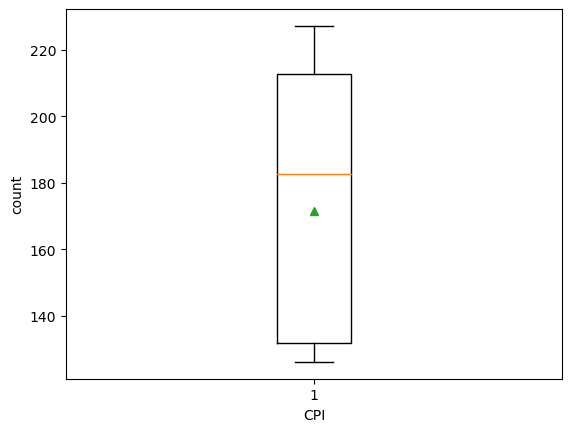

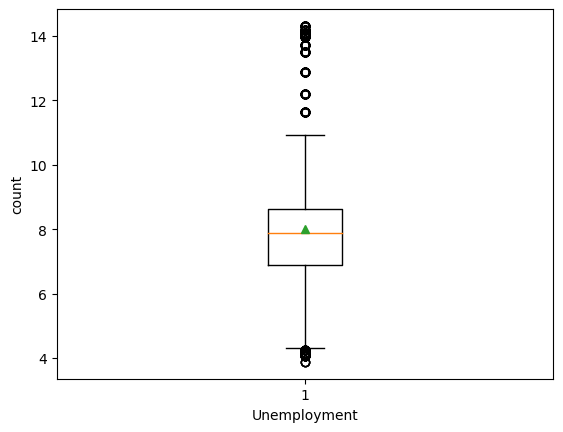

In [20]:
col = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i in col:
    plt.boxplot(df[i], showmeans=True)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()    

From the above boxplot we can say that we have outliers for the columns Weekly sales, temperature, and unemployment. 

Treating the outliers

In [21]:
o_col = ['Weekly_Sales', 'Temperature', 'Unemployment']
for i in o_col:
    x = np.quantile(df[i], [0.25, 0.75])
    iqr = x[1] - x[0]
    w = x[1] + 1.5*iqr
    v = x[0] - 1.5*iqr
    df[i] = np.where(df[i] > w, w, (np.where(df[i] < v, v, df[i])))

checking the outliers

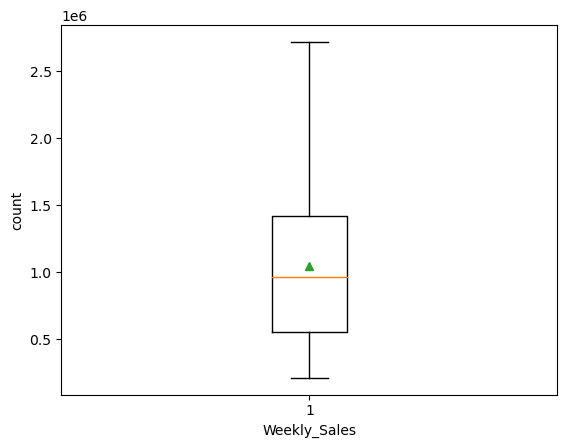

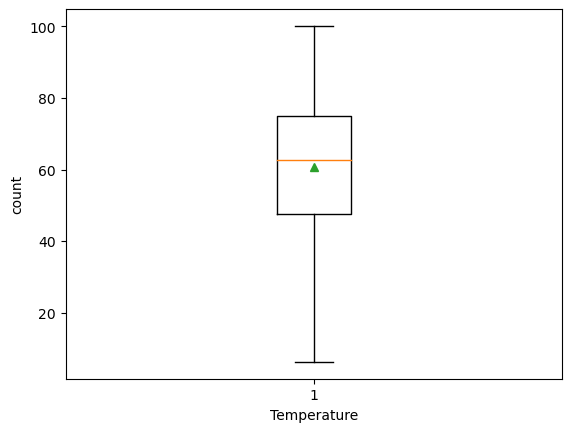

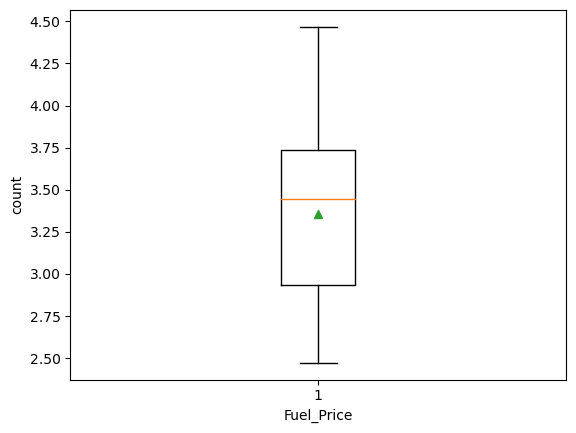

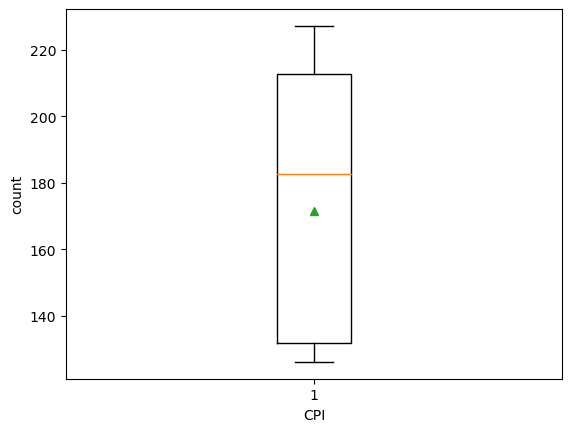

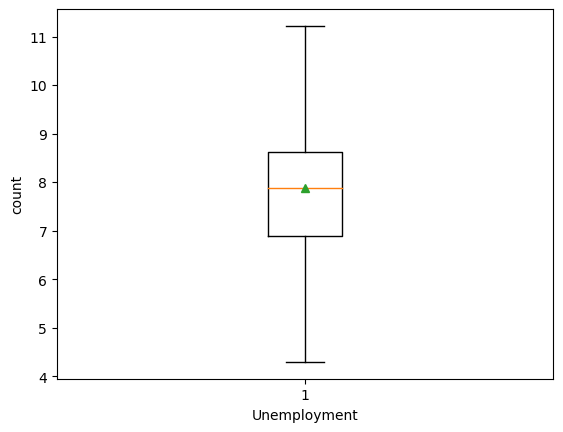

In [22]:
col = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i in col:
    plt.boxplot(df[i], showmeans=True)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()  

we can say by observing the graphs we don't have any outliers.

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
train_data = df[:-12]
test_data = df[-12:]

In [36]:
exog_train = train_data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
exog_test = test_data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

In [37]:
model = SARIMAX(train_data['Weekly_Sales'], exog=exog_train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 52))
results = model.fit()

In [38]:
predictions = results.forecast(steps=12, exog=exog_test)

In [39]:
test_data['Predictions'] = predictions

In [40]:
print(test_data)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6423     45 2012-08-10     733037.32             0        78.65       3.722   
6424     45 2012-08-17     722496.93             0        75.71       3.807   
6425     45 2012-08-24     718232.26             0        72.62       3.834   
6426     45 2012-08-31     734297.87             0        75.09       3.867   
6427     45 2012-09-07     766512.66             1        75.70       3.911   
6428     45 2012-09-14     702238.27             0        67.87       3.948   
6429     45 2012-09-21     723086.20             0        65.32       4.038   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0  

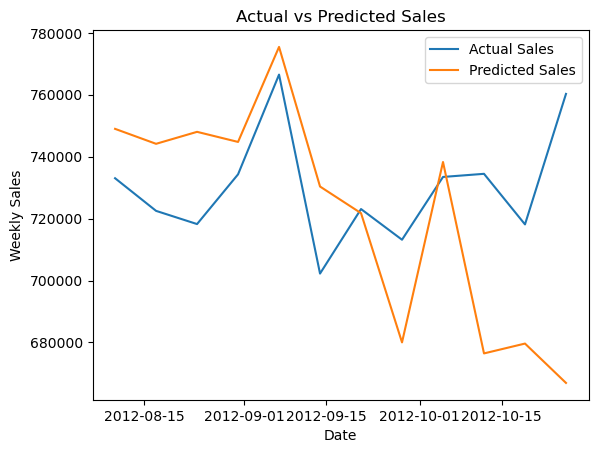

In [41]:
plt.plot(test_data['Date'], test_data['Weekly_Sales'], label='Actual Sales')
plt.plot(test_data['Date'], predictions, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()